### Question to answer: What are the most optimal skills to learn as an aspiring Data Scientist?

In the last section we identified the most popular and the highest paying Data Science skills, separately. Here, we combine our previous insights to find out which skills are overall the most optimal: this means looking at a skill's median salary, as well as its share in total job postings. Additionally, we group skill based on their respective technological categories.

In [192]:
#Importing libraries and data, cleaning data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
from adjustText import adjust_text


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [193]:
df_DS = df[df['job_title_short'] == "Data Scientist"].copy()
df_DS = df_DS.dropna(subset="salary_year_avg")
df_DS_explode = df_DS.explode('job_skills')

In [194]:
df_DS_skills = df_DS_explode.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count', ascending=False)
#renaming columns for greater clarity
df_DS_skills = df_DS_skills.rename(columns={'median':'median_salary','count':'skill_count'}) 

In [195]:
len(df_DS)

5922

In [196]:
DS_job_count = len(df_DS)
df_DS_skills['skill_percentage'] = df_DS_skills['skill_count']/DS_job_count * 100

In [197]:
cutoff_percent = 5
df_DS_skills = df_DS_skills[df_DS_skills['skill_percentage']  > cutoff_percent]
df_DS_skills

,median_salary,skill_count,skill_percentage
job_skills,,,
python,130500.0,4309,72.762580
sql,132500.0,3146,53.123945
r,125000.0,2484,41.945289
tableau,125000.0,1279,21.597433
sas,119000.0,1226,20.702465
aws,132500.0,1021,17.240797
spark,135000.0,944,15.940561
tensorflow,140000.0,637,10.756501
azure,127500.0,627,10.587639


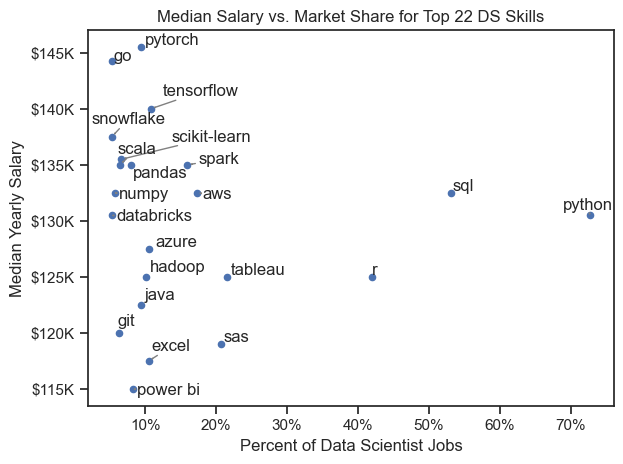

In [198]:
df_DS_skills.plot(kind='scatter', x='skill_percentage', y='median_salary')
texts = []
for i, txt in enumerate(df_DS_skills.index):
    texts.append(plt.text(df_DS_skills['skill_percentage'].iloc[i], df_DS_skills['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Median Salary vs. Market Share for Top {len(df_DS_skills)} DS Skills')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Now we will categorize the skills by their respective technological sectors.

In [199]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['ms access',
  'nuix',
  'alteryx',
  'microstrategy',
  'ssrs',
  'power bi',
  'sap',
  'word',
  'spss',
  'visio',
  'powerbi',
  'splunk',
  'datarobot',
  'outlook',
  'excel',
  'dax',
  'sheets',
  'cognos',
  'sas',
  'sharepoint',
  'msaccess',
  'ssis',
  'qlik',
  'powerpoint',
  'tableau',
  'spreadsheet',
  'esquisse',
  'looker'],
 'programming': ['bash',
  'assembly',
  'vb.net',
  'vba',
  'javascript',
  'scala',
  'mongodb',
  'f#',
  'dart',
  'matlab',
  'c#',
  'perl',
  'c',
  'ocaml',
  'haskell',
  'golang',
  'no-sql',
  'clojure',
  'lisp',
  'visualbasic',
  'r',
  'c++',
  'visual basic',
  'rust',
  'delphi',
  'swift',
  'shell',
  'cobol',
  'pascal',
  'go',
  'sass',
  'python',
  'solidity',
  'css',
  'html',
  't-sql',
  'kotlin',
  'groovy',
  'apl',
  'objective-c',
  'sas',
  'nosql',
  'typescript',
  'erlang',
  'julia',
  'sql',
  'lua',
  'fortran',
  'java',
  'crystal',
  'elixir',
  'mongo',
  'ruby',
  'powershell',
  '

In [205]:
#convert to DataFrame
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,ms access
0,analyst_tools,nuix
0,analyst_tools,alteryx
0,analyst_tools,microstrategy
0,analyst_tools,ssrs
...,...,...
9,sync,rocketchat
9,sync,wire
9,sync,microsoft teams
9,sync,ringcentral


In [217]:
df_DS_skills_tech = df_DS_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_DS_skills_tech = df_DS_skills_tech.set_index('skills')

In [218]:
for a,b in enumerate(df_DS_skills_tech.index):
    print(a,b)

0 python
1 sql
2 r
3 tableau
4 sas
5 sas
6 aws
7 spark
8 tensorflow
9 azure
10 excel
11 hadoop
12 pytorch
13 java
14 power bi
15 pandas
16 scikit-learn
17 scala
18 git
19 numpy
20 go
21 snowflake
22 databricks


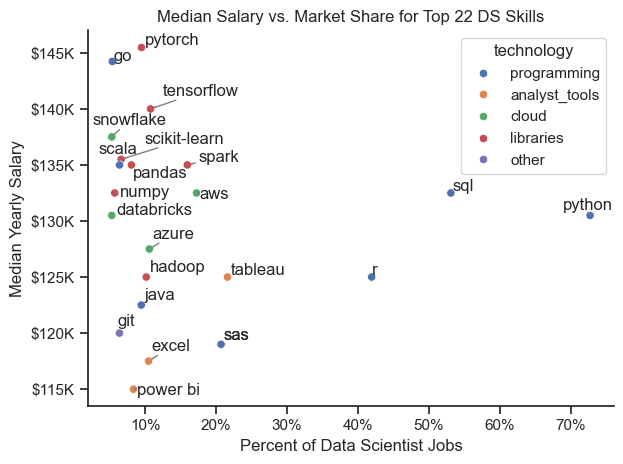

In [219]:
sns.scatterplot(data=df_DS_skills_tech, x='skill_percentage', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title(f'Median Salary vs. Market Share for Top {len(df_DS_skills)} DS Skills')

#Preparing texts for adjustText
texts = []
for i, txt in enumerate(df_DS_skills_tech.index):
    texts.append(plt.text(df_DS_skills_tech['skill_percentage'].iloc[i], df_DS_skills_tech['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
# Adjust layout and display the plot
plt.tight_layout()
plt.show()